In [3]:
from google.colab import drive
import os
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
base_dir='/content/drive/MyDrive/projek/'
!ls "/content/drive/MyDrive/projek/"

bahan  testing	training


In [5]:
bahan_dir = os.path.join(base_dir, 'bahan')
training_dir = os.path.join(base_dir, 'training')
testing_dir = os.path.join(base_dir, 'testing')

In [6]:
anoadataranrendah_dir = os.path.join(bahan_dir, 'anoadataranrendah/') 
babirusasulawesi_dir = os.path.join(bahan_dir, 'babirusasulawesi/') 
julangsulawesi_dir = os.path.join(bahan_dir, 'julangsulawesi/') 
kangkarengsulawesi_dir = os.path.join(bahan_dir, 'kangkarengsulawesi/') 
kuskusberuang_dir = os.path.join(bahan_dir, 'kuskusberuang/') 
kuskuskerdil_dir = os.path.join(bahan_dir, 'kuskuskerdil/') 
maleosenkawor_dir = os.path.join(bahan_dir, 'maleosenkawor/') 
musangsulawesi_dir = os.path.join(bahan_dir, 'musangsulawesi/') 
tangkasi_dir = os.path.join(bahan_dir, 'tangkasi/') 
yakisulawesi_dir = os.path.join(bahan_dir, 'yakisulawesi/') 

print('Jumlah gambar tangkasi : ', len(os.listdir(tangkasi_dir)))

Jumlah gambar tangkasi :  245


In [7]:
training_anoadataranrendah = os.path.join(training_dir, 'anoadataranrendah/') 
training_babirusasulawesi = os.path.join(training_dir, 'babirusasulawesi/') 
training_julangsulawesi = os.path.join(training_dir, 'julangsulawesi/') 
training_kangkarengsulawesi = os.path.join(training_dir, 'kangkarengsulawesi/') 
training_kuskusberuang = os.path.join(training_dir, 'kuskusberuang/') 
training_kuskuskerdil = os.path.join(training_dir, 'kuskuskerdil/') 
training_maleosenkawor = os.path.join(training_dir, 'maleosenkawor/') 
training_musangsulawesi = os.path.join(training_dir, 'musangsulawesi/') 
training_tangkasi = os.path.join(training_dir, 'tangkasi/') 
training_yakisulawesi = os.path.join(training_dir, 'yakisulawesi/') 

testing_anoadataranrendah = os.path.join(testing_dir, 'anoadataranrendah/') 
testing_babirusasulawesi = os.path.join(testing_dir, 'babirusasulawesi/') 
testing_julangsulawesi = os.path.join(testing_dir, 'julangsulawesi/') 
testing_kangkarengsulawesi = os.path.join(testing_dir, 'kangkarengsulawesi/') 
testing_kuskusberuang = os.path.join(testing_dir, 'kuskusberuang/') 
testing_kuskuskerdil = os.path.join(testing_dir, 'kuskuskerdil/') 
testing_maleosenkawor = os.path.join(testing_dir, 'maleosenkawor/') 
testing_musangsulawesi = os.path.join(testing_dir, 'musangsulawesi/') 
testing_tangkasi = os.path.join(testing_dir, 'tangkasi/') 
testing_yakisulawesi = os.path.join(testing_dir, 'yakisulawesi/') 

In [8]:
print('Jumlah All tangkasi :', len(os.listdir(tangkasi_dir)))
print('Jumlah Training tangkasi :', len(os.listdir(training_tangkasi)))
print('Jumlah Testing tangkasi :', len(os.listdir(testing_tangkasi)))


Jumlah All tangkasi : 245
Jumlah Training tangkasi : 212
Jumlah Testing tangkasi : 33


**PRE PROCCESING**

In [9]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range = 30,
    horizontal_flip = True,
    shear_range = 0.3,
    fill_mode = 'nearest',
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    zoom_range = 0.1
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range = 30,
    horizontal_flip = True,
    shear_range = 0.3,
    fill_mode = 'nearest',
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    zoom_range = 0.1
)

In [11]:
train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size = (150,150),
    batch_size = 10,
    class_mode = 'categorical'
)

val_generator = train_datagen.flow_from_directory(
    testing_dir,
    target_size = (150,150),
    batch_size = 10,
    class_mode = 'categorical'
)

Found 2156 images belonging to 10 classes.
Found 330 images belonging to 10 classes.


In [12]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs ={}):
    if(logs.get('accuracy')>0.99):
      print('\nAkurasi mencapai 99%')
      self.model.stop_training = True
callbacks = myCallback()

**MODEL CNN**

In [26]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(200, activation = 'relu'),
    tf.keras.layers.Dropout(0.3,seed=112),
    tf.keras.layers.Dense(500, activation = 'relu'),
    tf.keras.layers.Dropout(0.5,seed=112),
    tf.keras.layers.Dense(10, activation= 'sigmoid')
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [28]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'Adam',
              metrics = ['accuracy'])
    

In [30]:
history = model.fit(
    train_generator,
    steps_per_epoch = 6,
    epochs= 25,
    validation_data = val_generator,
    validation_steps = 1,
    verbose = 1,
    callbacks = [callbacks]
)

Epoch 1/25
6/6 [==============================] - 61s 12s/step - loss: 2.3138 - accuracy: 0.1667 - val_loss: 2.3160 - val_accuracy: 0.0000e+00
Epoch 2/25
6/6 [==============================] - 22s 3s/step - loss: 2.2638 - accuracy: 0.2000 - val_loss: 2.3711 - val_accuracy: 0.0000e+00
Epoch 3/25
6/6 [==============================] - 22s 4s/step - loss: 2.3221 - accuracy: 0.1333 - val_loss: 2.2876 - val_accuracy: 0.0000e+00
Epoch 4/25
6/6 [==============================] - 20s 3s/step - loss: 2.3137 - accuracy: 0.1167 - val_loss: 2.3219 - val_accuracy: 0.1000
Epoch 5/25
6/6 [==============================] - 18s 3s/step - loss: 2.2928 - accuracy: 0.1167 - val_loss: 2.2810 - val_accuracy: 0.1000
Epoch 6/25
6/6 [==============================] - 17s 3s/step - loss: 2.2881 - accuracy: 0.1500 - val_loss: 2.3547 - val_accuracy: 0.0000e+00
Epoch 7/25
6/6 [==============================] - 16s 3s/step - loss: 2.2638 - accuracy: 0.1667 - val_loss: 2.2865 - val_accuracy: 0.2000
Epoch 8/25
6/6 [=

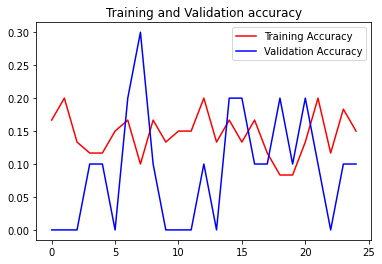

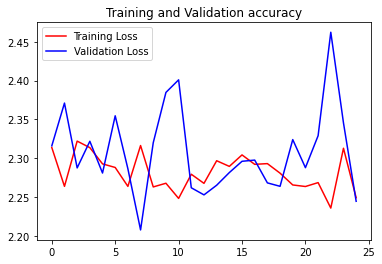

In [34]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend(loc= 'best')
plt.show()

plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation accuracy')
plt.legend(loc= 'best')
plt.show()

**PERCOBAAN KLASIFIKASI**

Saving 00000044.jpg to 00000044.jpg
1/1 [==============================] - 0s 28ms/step
00000044.jpg
Ini adalah hewan :  kuskuskerdil


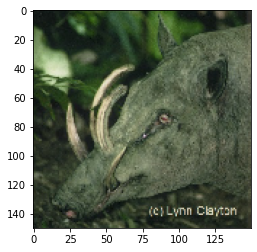

In [43]:
import numpy as np
from tensorflow.keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn
  img = image.load_img(path, target_size = (150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 100)

  print(fn)

  class_list = os.listdir(training_dir)
  
  for j in range(42):
    if classes[0][j] == 1. :
      print('Ini adalah hewan : ', class_list[j-1])
      break